## Python Basic

In [1]:
a = 2
b = 3
a + b

5

In [2]:
a + 10

12

## 使用GET 抓取網頁

In [6]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
res

<Response [200]>

In [8]:
#res.text

In [10]:
type(res)

requests.models.Response

## 使用BeautifulSoup 剖析頁面

In [9]:
from bs4 import BeautifulSoup 
html_sample = '''
<html> 
 <body> 
   <h1 id="title">Hello World</h1> 
   <a href="#" class="link">This is link1</a> 
   <a href="# link2" class="link">This is link2</a> 
 </body> 
</html>'''

soup = BeautifulSoup(html_sample, 'html.parser')
soup.text


'\n\n\nHello World\nThis is link1\nThis is link2\n\n'

In [11]:
type(soup)

bs4.BeautifulSoup

In [15]:
print(soup.select('h1'))
print(soup.select('h1')[0])
print(soup.select('h1')[0].text)

[<h1 id="title">Hello World</h1>]
<h1 id="title">Hello World</h1>
Hello World


In [18]:
print(soup.select_one('h1'))
print(soup.select_one('h1').text)

<h1 id="title">Hello World</h1>
Hello World


In [21]:
print(soup.select('a'))
print(soup.select('a')[0])
print(soup.select('a')[0].text)

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]
<a class="link" href="#">This is link1</a>
This is link1


In [24]:
print(soup.select('a'))

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]


In [26]:
for link in soup.select('a'):
    #print(link)
    print(link.text)

This is link1
This is link2


In [28]:
# id => #
soup.select('#title')

[<h1 id="title">Hello World</h1>]

In [29]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [34]:
for link in soup.select('.link'):
    #print(link)
    #print(link.text)
    print(link['href'])

#
# link2


## 蘋果新聞搜集實做

In [38]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
#res.text

In [39]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [55]:
domain = 'http://www.appledaily.com.tw'
for news in soup.select('.rtddt a'):
    #print(news)
    #print(news.select('h1')[0].text)
    #print(news.select('h2')[0].text)
    #print(news.select('time')[0].text)
    #print(domain + news['href'])
    title    = news.select('h1')[0].text
    category = news.select('h2')[0].text
    time     = news.select('time')[0].text
    url      = domain + news['href']
    print(title, category, time, url)
    print("=============================")

【獨家】海軍驚爆不倫戀！　已婚男女軍士官...(0) 政治 11:30 http://www.appledaily.com.tw/realtimenews/article/politics/20170911/1200855/【獨家】海軍驚爆不倫戀！　已婚男女軍士官簽性愛合約書
奧斯卡影后多倫多集合　凱特溫絲蕾霸氣比讚(23) 娛樂 11:29 http://www.appledaily.com.tw/realtimenews/article/entertainment/20170911/1201313/奧斯卡影后多倫多集合　凱特溫絲蕾霸氣比讚
木柵農會代表賄選案　15人都認罪(0) 社會 11:28 http://www.appledaily.com.tw/realtimenews/article/local/20170911/1201338/木柵農會代表賄選案　15人都認罪
為稅改按讚　童子賢：提高扣除額是減輕出力...(0) 財經 11:28 http://www.appledaily.com.tw/realtimenews/article/finance/20170911/1201355/為稅改按讚　童子賢：提高扣除額是減輕出力人負擔
新iPhone 9/15預購　台哥大粉專...(0) 3C 11:27 http://www.appledaily.com.tw/realtimenews/article/3c/20170911/1201356/新iPhone9/15預購　台哥大粉專這樣說
作家看妙禪　「還不如賣１０元自助餐阿嬤」(17) 生活 11:23 http://www.appledaily.com.tw/realtimenews/article/life/20170911/1201347/作家看妙禪　「還不如賣１０元自助餐阿嬤」
單身女15坪小宅　私密空間好強大(102) 地產 11:22 http://www.appledaily.com.tw/realtimenews/article/property/20170911/1198161/單身女15坪小宅　私密空間好強大
柯市長勞軍有三「怪」(6) 論壇 11:22 http://www.appledaily.com.tw/realtimenews/article/forum/20170911/120

In [60]:
domain = 'http://www.appledaily.com.tw'
newsary = []
for news in soup.select('.rtddt a'):
    dic             = {}
    dic['title']    = news.select('h1')[0].text
    dic['category'] = news.select('h2')[0].text
    dic['time']     = news.select('time')[0].text
    dic['url']      = domain + news['href']
    #print(dic)
    newsary.append(dic)

In [65]:
import pandas
df = pandas.DataFrame(newsary)
df.head(3)

,category,time,title,url
0,政治,11:30,【獨家】海軍驚爆不倫戀！ 已婚男女軍士官...(0),http://www.appledaily.com.tw/realtimenews/arti...
1,娛樂,11:29,奧斯卡影后多倫多集合 凱特溫絲蕾霸氣比讚(23),http://www.appledaily.com.tw/realtimenews/arti...
2,社會,11:28,木柵農會代表賄選案 15人都認罪(0),http://www.appledaily.com.tw/realtimenews/arti...


## 字典

In [56]:
# list
a = [1,2,3,4,5]

# dict 
dic = {'a':1, 'b':2, 'c':3}
dic['a'] 

1

In [57]:
dic['d'] = 4
dic

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

## 抓取多頁新聞

In [72]:
import requests
url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
for page in range(1,4):
    # format
    print(url.format(page))
    

http://www.appledaily.com.tw/realtimenews/section/new/1
http://www.appledaily.com.tw/realtimenews/section/new/2
http://www.appledaily.com.tw/realtimenews/section/new/3


In [75]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
domain = 'http://www.appledaily.com.tw'
newsary = []
for page in range(1,51):
    # format
    newsurl = url.format(page)
    res = requests.get(newsurl)
    soup = BeautifulSoup(res.text, 'html.parser')
    for news in soup.select('.rtddt a'):
        dic             = {}
        dic['title']    = news.select('h1')[0].text
        dic['category'] = news.select('h2')[0].text
        dic['time']     = news.select('time')[0].text
        dic['url']      = domain + news['href']
        newsary.append(dic)    

In [77]:
import pandas
df = pandas.DataFrame(newsary)
df.head()

,category,time,title,url
0,財經,13:18,郭董還沒買到手 東芝頂尖人才爆集體出走(0),http://www.appledaily.com.tw/realtimenews/arti...
1,國際,13:17,洛興雅民兵提停火 緬甸：不和「恐怖份子」...(0),http://www.appledaily.com.tw/realtimenews/arti...
2,社會,13:17,偷錢遭父親女友痛打 男童今年3月曾在超商...(0),http://www.appledaily.com.tw/realtimenews/arti...
3,動物,13:15,【驚奇片】完美重曡 貓中貓花紋紅翻日本(2907),http://www.appledaily.com.tw/realtimenews/arti...
4,時尚,13:15,男子漢也怕冷 鍾承翰有嘉裕西服帥氣暖身(0),http://www.appledaily.com.tw/realtimenews/arti...


In [81]:
# http://www.appledaily.com.tw/realtimenews/article/finance/20170911/1201465/%E9%83%AD%E8%91%A3%E9%82%84%E6%B2%92%E8%B2%B7%E5%88%B0%E6%89%8B/u3000%E6%9D%B1%E8%8A%9D%E9%A0%82%E5%B0%96%E4%BA%BA%E6%89%8D%E7%88%86%E9%9B%86%E9%AB%94%E5%87%BA%E8%B5%B0
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/article/finance/20170911/1201465/郭董還沒買到手\u3000東芝頂尖人才爆集體出走')
#res.text

In [82]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [84]:
soup.select('#h1')[0].text

'郭董還沒買到手\u3000東芝頂尖人才爆集體出走'

In [87]:
soup.select('#summary')[0].text

'根據《日本經濟新聞》報導，東芝（Toshiba）的麻煩看來難在短期內收尾，而其出售快閃記憶體業務的計劃仍未擺脫僵局，在公司前景不明下，競爭對手和招聘業者均積極挖角東芝頂尖工程師，東芝未來發展所仰賴的人才有許多已出走，人才外流嚴重。報導指出，東芝四日市記憶體晶片廠1名40多位工程師表示，近幾個月接過2通來自人力公司的電話，他拒絕了對方的提案，但「春初以來，已有多位同事辭職，但沒說要去哪裡。」該名工程師還表示，曾看過獵人頭公司的人在四日市廠外，以及位在橫濱的晶片設計與開發廠外堵人，他們透過學術會議或詢問剛離開的東芝前員工，鎖定最優秀的工程師。東芝在今年3月底時約有15.3萬名員工，但在接下來的3個月減少1000人，當中很多人可能跳槽至其他公司。（于倩若／綜合外電報導）\xa0'

In [95]:
dt = soup.select('.gggs time')[0].text

from datetime import datetime
dt2 = datetime.strptime(dt , '%Y年%m月%d日%H:%M')
datetime.now() - dt2

datetime.timedelta(0, 1213, 233630)

In [130]:
clicked = soup.select('.clicked')[0].text
print(clicked)

import re
# () get group from the pattern
m = re.match('人氣\((\d+)\)', clicked)
m.group(1)

人氣(18)


'18'

In [131]:
def getNewsDetail(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    # get title
    title = soup.select('#h1')[0].text
    
    # get content
    content = soup.select('#summary')[0].text
    
    # get time
    dt = soup.select('.gggs time')[0].text
    dt = datetime.strptime(dt , '%Y年%m月%d日%H:%M')    
    
    # get clicked
    clicked = soup.select('.clicked')[0].text
    m = re.match('人氣\((\d+)\)', clicked)
    clicked = m.group(1)    

    return({'title': title, 'content': content, 'dt': dt, 'clicked': clicked})

In [132]:
getNewsDetail('http://www.appledaily.com.tw/realtimenews/article/finance/20170911/1201465/%E9%83%AD%E8%91%A3%E9%82%84%E6%B2%92%E8%B2%B7%E5%88%B0%E6%89%8B/u3000%E6%9D%B1%E8%8A%9D%E9%A0%82%E5%B0%96%E4%BA%BA%E6%89%8D%E7%88%86%E9%9B%86%E9%AB%94%E5%87%BA%E8%B5%B0')

{'clicked': '2378',
 'content': '根據《日本經濟新聞》報導，東芝（Toshiba）的麻煩看來難在短期內收尾，而其出售快閃記憶體業務的計劃仍未擺脫僵局，在公司前景不明下，競爭對手和招聘業者均積極挖角東芝頂尖工程師，東芝未來發展所仰賴的人才有許多已出走，人才外流嚴重。報導指出，東芝四日市記憶體晶片廠1名40多位工程師表示，近幾個月接過2通來自人力公司的電話，他拒絕了對方的提案，但「春初以來，已有多位同事辭職，但沒說要去哪裡。」該名工程師還表示，曾看過獵人頭公司的人在四日市廠外，以及位在橫濱的晶片設計與開發廠外堵人，他們透過學術會議或詢問剛離開的東芝前員工，鎖定最優秀的工程師。東芝在今年3月底時約有15.3萬名員工，但在接下來的3個月減少1000人，當中很多人可能跳槽至其他公司。（于倩若／綜合外電報導）\xa0',
 'dt': datetime.datetime(2017, 9, 11, 13, 18),
 'title': '郭董還沒買到手\u3000東芝頂尖人才爆集體出走'}

## 產生完整蘋果爬蟲

In [147]:
def getNewsDetail(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    # get title
    title = soup.select('#h1')[0].text
    
    # get content
    content = soup.select('#summary')[0].text
    
    # get time
    dt = soup.select('.gggs time')[0].text
    dt = datetime.strptime(dt , '%Y年%m月%d日%H:%M')    
    
    # get clicked
    clicked = 0
    if soup.select('.clicked'):
        clicked = soup.select('.clicked')[0].text
        m = re.match('人氣\((\d+)\)', clicked)
        if m:
            clicked = int(m.group(1))

    return({'title': title, 'content': content, 'dt': dt, 'clicked': clicked})

In [149]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
domain = 'http://www.appledaily.com.tw'
newsary = []
for page in range(1,10):
    # format
    newsurl = url.format(page)
    res = requests.get(newsurl)
    soup = BeautifulSoup(res.text, 'html.parser')
    for news in soup.select('.rtddt a'):
        dic             = {}
        dic['category'] = news.select('h2')[0].text
        dic['url']      = domain + news['href']
        dic.update(getNewsDetail(dic['url']))
        newsary.append(dic)    

In [150]:
import pandas
newsdf = pandas.DataFrame(newsary)
newsdf.head()

,category,clicked,content,dt,title,url
0,體育,0,台灣女將詹詠然在美國網球公開賽奪下女雙冠軍，但仍因台北世大運棄賽，飽受批評。BBS站批踢踢的...,2017-09-11 14:12:00,暗批詹詠然沒誠信！PTT創世神：代言什麼都抵制,http://www.appledaily.com.tw/realtimenews/arti...
1,財經,9819,（新增郭董特助胡國輝今天談話、調整標題）彭博報導，在日本東芝本周三將召開董事會敲定晶片事業最...,2017-09-11 14:10:00,郭董周三決戰前再放話 鴻海追東芝出價2.1兆日圓,http://www.appledaily.com.tw/realtimenews/arti...
2,娛樂,5631,（新增：照片、內文）韓國27歲男星姜河那2013年以《繼承者們》走紅，去年在《步步驚心：麗》...,2017-09-11 14:10:00,撇入伍前夕祕會IU 姜河那IG曬剃頭照告別,http://www.appledaily.com.tw/realtimenews/arti...
3,生活,0,本內容由財訊雙週刊提供「噢！他來跟我們搶包包了！」8月24日，藝人殷悅Melody主持直播公...,2017-09-11 14:10:00,【財訊】Yahoo TV直播拍賣夯 大老闆想玩更大,http://www.appledaily.com.tw/realtimenews/arti...
4,生活,301,(更新：新增影片)泰利颱風來勢洶洶，高市梓官的蔬菜專區已提前通知菜農們積極採收，將已經到採收...,2017-09-11 14:09:00,梓官蔬菜到貨增2成 冷藏入庫夠一週用,http://www.appledaily.com.tw/realtimenews/arti...


In [156]:
#newsdf.to_clipboard()
#newsdf.to_csv('news.csv', encoding='utf-8-sig')
newsdf.to_excel('news.xlsx')

In [1]:
import pandas
newsdf = pandas.read_excel('news.xlsx')

In [2]:
# SELECT category, avg(clicked) FROM newsdf
# GROUP BY category
newsdf.groupby('category')['clicked'].mean()


# SELECT category, avg(clicked) FROM newsdf
# GROUP BY category ORDER BY avg(clicked) DESC
newsdf.groupby('category')['clicked'].mean().sort_values(ascending = False)

category
體育     36631.160000
娛樂     24373.090909
政治     22709.400000
社會     12325.196721
生活     10801.709677
財經      6023.628571
國際      4965.200000
地產      2217.500000
3C      2061.600000
論壇      1802.800000
動物      1295.857143
時尚      1226.000000
壹週刊        0.000000
Name: clicked, dtype: float64

## 產生中文圖示
-  cd C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data
- 修改 matplotlibrc
- (大約在 196 行) 拿掉註解 font.family         : sans-serif
- (大約在 208 行) 拿掉註解, 增加微軟雅黑體 font.sans-serif: Microsoft YaHei, 
- 重開 Notebook


Populating the interactive namespace from numpy and matplotlib


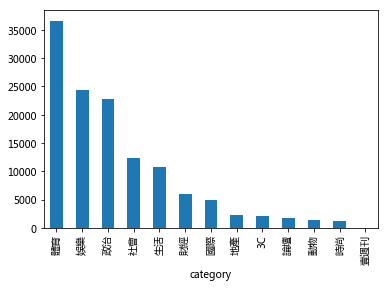

In [3]:
%pylab inline 
stat = newsdf.groupby('category')['clicked'].mean().sort_values(ascending = False)
stat.plot(kind = 'bar')

## 時間處理

In [93]:
from datetime import datetime

# 知道現在時間
datetime.now()

#時間變字串 - strftime
datetime.now().strftime('%Y-%m-%d')

#字串變時間 - strptime
a = '2017-05-02'
datetime.strptime(a, '%Y-%m-%d')

# 比較時間
datetime.now() - datetime.strptime(a, '%Y-%m-%d')

datetime.timedelta(132, 48977, 601016)

## 正規表達法

In [98]:
a = '0912345653'
a == '0912345653'

True

In [104]:
a = '3'

import re
print(re.match('3',a))
print(re.match('5',a))

# [] match any word in []
print(re.match('[0123456789]',a))

# - continuation : [0123456789] => [0-9]
print(re.match('[0-9]',a))

# \d match digit : [0-9] => \d
print(re.match('\d',a))

<_sre.SRE_Match object; span=(0, 1), match='3'>
None
<_sre.SRE_Match object; span=(0, 1), match='3'>
<_sre.SRE_Match object; span=(0, 1), match='3'>
<_sre.SRE_Match object; span=(0, 1), match='3'>


In [109]:
a = 'w'

# [] match any word in []
print(re.match('[abcdefghijklmnopqrstuvewxyz]',a))

# - continuation
print(re.match('[a-z]',a))

# [a-zA-Z] match upper and lower digit
a = 'W'
print(re.match('[a-z]',a))
print(re.match('[a-zA-Z]',a))

# \w match alphabet and number [a-zA-Z0-9] => \w 
print(re.match('\w',a))

<_sre.SRE_Match object; span=(0, 1), match='w'>
<_sre.SRE_Match object; span=(0, 1), match='w'>
None
<_sre.SRE_Match object; span=(0, 1), match='W'>
<_sre.SRE_Match object; span=(0, 1), match='W'>


In [111]:
a = '^&*$#^*$'
print(re.match('\w',a))

# . match any word
print(re.match('.',a))

None
<_sre.SRE_Match object; span=(0, 1), match='^'>


In [117]:
a = '0912123123'

# {10} match exact 10 symbol
print(re.match('\d{10}', a))

# {6,12} match symbols between 6 to 12
b = '8845252'
print(re.match('\d{6,12}', b))


# {1,} match at least one
b = '8845252'
print(re.match('\d{1,}', b))

# + match at least one : + => {1,}
print(re.match('\d+', b))


# {0,} match at least zero
b = '8845252'
print(re.match('\d{0,}', b))


# * match at least zero: * => {0,}
b = '8845252'
print(re.match('\d{0,}', b))

<_sre.SRE_Match object; span=(0, 10), match='0912123123'>
<_sre.SRE_Match object; span=(0, 7), match='8845252'>
<_sre.SRE_Match object; span=(0, 7), match='8845252'>
<_sre.SRE_Match object; span=(0, 7), match='8845252'>
<_sre.SRE_Match object; span=(0, 7), match='8845252'>
<_sre.SRE_Match object; span=(0, 7), match='8845252'>


In [123]:
phones = ['0912345678', '0912-345678', '0912-345-678','09123456781237182371983791']
for p in phones:
    #print(re.match('09\d{8}' , p))
    #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}' , p))
    
    # ? match symbols between 0 to 1 ? => {0,1}
    print(re.match('09\d{2}-?\d{3}-?\d{3}' , p))
    
    # ^ exactly match inital character
    # $ exactly match end character
    print(re.match('^09\d{2}-?\d{3}-?\d{3}$' , p))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
None


## 抓取粉絲頁按讚名單


In [17]:
import requests
payload = {
'__user':'778224889',
'__a':'1',
'__dyn':'5V4cjLx2ByK5A9UkKHqAzk5EWq2W8GAdyemt9LFGA4VEvCAyWGawIhEnUF7yWCHxCEjCyEnyo88ObGubyRQ8y9UG5WjxamjDK8xmAcUK4F98lDokwIVVoK6VrCAUKjVuu-exvz8Gicx2q5odElByECiiV8G5p8hzEnwyG5HxirXm4bBxK7Wxqp4ypK59XgDxq8xe5pVkdy8gwEGUGqdUlzVEhKHVoggoAnVXKmlqBCza8IHGfjg8lfy9E89aybV98-8iypqjCzooxO6ryJ38ym4p88bzoGq4okBHCw',
'__af':'h0',
'__req':'1o',
'__be':'1',
'__pc':'PHASED:fb_stories_pkg',
'__rev':'3288106',
'fb_dtsg':'AQERGBz1QTY7:AQGHVwVKb3zR',
'jazoest':'265816982716612249818489555865817172861198675985112282'    
}
headers = {
 'cookie':'<cookie>'   
    
}
res = requests.post('https://www.facebook.com/pages/admin/people_and_other_pages/entquery/?query_edge_key=PEOPLE_WHO_LIKE_THIS_PAGE&page_id=1545795882367060&offset=0&limit=8000&dpr=1', data = payload, headers = headers)


In [18]:
import json
jd = json.loads(res.text.lstrip('for (;;);'))

In [20]:
import pandas
ary = []
for rec in jd['payload']['data']:
    dic = {}
    dic.update(rec['profile'])
    dic['timestamp'] = rec['timestamp']
    ary.append(dic)
df = pandas.DataFrame(ary)
df.head(3)

,desc,id,name,size,timestamp
0,None,100006270873371,許智和,32,1505101692
1,None,100002078268750,Simon Wang,32,1504846669
2,None,100000153037561,Yu-Wen Liu,32,1504801667


In [ ]:
1612050888869232?fields=likes.summary(1).limit(0)

## 抓取新聞按讚數 

In [34]:
import requests
#TOKEN = 'EAACEdEose0cBAABXOQQrevLelHlzw2d9wHZC9xeUhJ53yHhZASZCn65liewjVPWPF24Vk4sHoxdiNFsnGNN18a7GEp1uUzTYS7tQ2qZCeDxZChzrVQHLxkjKnAP692FkEcU0R6uk1xxFtlxMqQqWHLjAWUG33ZB6FedPnJWjn9HX1d2ZAIXTxP6fNX9ijhWTdUZD'
KEY    = '<KEY>'
SECRET = '<SECRET>'
TOKEN = '{}|{}'.format(KEY,SECRET)

PAGEURL = 'http://www.appledaily.com.tw/realtimenews/article/sports/20170911/1201499'
res = requests.get('https://graph.facebook.com/v2.10/{}?fields=id,og_object&access_token={}'.format(PAGEURL,TOKEN))
jd = res.json()
newsid = jd['og_object']['id']

In [35]:
import requests
res = requests.get('https://graph.facebook.com/v2.10/{}?access_token={}&fields=comments.limit(0).summary(true)%2Clikes.limit(0).summary(true)&format=json'.format(newsid, TOKEN))
jd2  = res.json()
jd2['likes']['summary']['total_count']

844